<a href="https://colab.research.google.com/github/Khemapsorn/data_viz_2022/blob/main/SVEIQCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เตรียมโค้ดคำนวณ

In [1]:
#import libralies
import pandas as pd # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # พล็อตกราฟต่างๆ 

from scipy.integrate import odeint #Integrate a system of ordinary differential equations.
                                                # func(y, t0, ...) 

%config InlineBackend.figure_format = 'retina'

#SVEIQCR simulation of Monkeypox in human

## พารามิเตอร์ของตัวแบบ และสมการเชิงอนุพันธ์

In [3]:
 #SVEIQCR model ในประชากรมนุษย์
 #Differential equations
def deriv (y, t,Nh, Lambda, Phi, Mu, Lamda, Nu, theta, Beta, delta, alpha, Tau, Rho,gamma): # paramerter ในตัวแบบ โดย t คือ เวลา N จำนวนประชากรมนุษย์ทั้งหมด
    S, V, E, I, Q, C, R = y
    dSdt = Lambda+Phi*Q-Mu*S-Lamda*S-Nu*S
    dVdt = Nu*S+Mu*V
    dEdt = Lamda*S-Mu*E-theta*E-Beta*E
    dIdt = theta*E-delta*I-Mu*I-Rho*I-gamma*I
    dQdt = Beta*E-delta*Q-Mu*Q-Phi*Q-Tau*Q
    dCdt = gamma*I-delta*C-Mu*C-alpha*C
    dRdt =Rho*I+Tau*Q+alpha*C-Mu*R
    return dSdt, dVdt, dEdt, dIdt, dQdt, dCdt, dRdt

In [6]:
#Initial number 
S0 = 330745021
V0 = 717362
E0 = 700000
I0 = 28615
Q0 = 670387
C0 = 10000
R0 = 28615
Nh = S0+V0+E0+I0+Q0+C0+R0

# Time period (100 days)
t = np.arange(0,100,1)

# parameter value
Lambda =0.029
Phi = 0.5
Mu = 0.0003
Lamda = 0.008669
Nu =0 #0%
theta = 0.032
Beta = 0 # กักตัว 0 วัน
delta = 0.2
alpha = 0.036
Tau = 0.52
Rho = 0.088
gamma = 0.5
Beta1 = 0.012
Beta2 = 0.052
Beta3 = 0.022

# Constant rate 
L = 0.029
P = 0.5
M= 0.0003
LD = 0.00000189
V = 0
T =0.032
B =0
D =0.2
A =0.036
J = 0.52
R = 0.088
G = 0.5
B1 = 0.012
B2 = 0.052
B3 = 0.022

#Integration SVEIQCR model
result = odeint(deriv, (S0, V0, E0, I0, Q0, C0,R0), t, args = (Nh,L,P, M,LD,V,T,B,D,A,J,R,G))

#Summary
simulationResult = pd.DataFrame(result, columns = ['Susceptible','Vaccine','Exposed', 'Infectious','Quarantine','Clinically','Recovered' ])
simulationResult = simulationResult.astype(np.int32)

In [7]:
simulationResult

,Susceptible,Vaccine,Exposed,Infectious,Quarantine,Clinically,Recovered
0,330745021,717362,700000,28615,670387,10000,28615
1,330838763,717577,678366,28234,197859,20564,232988
2,330796034,717792,657420,27590,58396,28666,295685
3,330713047,718007,637140,26843,17235,34749,316675
4,330618200,718223,617504,26062,5086,39209,325419
...,...,...,...,...,...,...,...
95,321661117,738100,50633,2110,0,4916,454922
96,321564025,738322,49622,2067,0,4811,455145
97,321466963,738543,48643,2026,0,4710,455360
98,321369930,738765,47695,1986,0,4611,455567


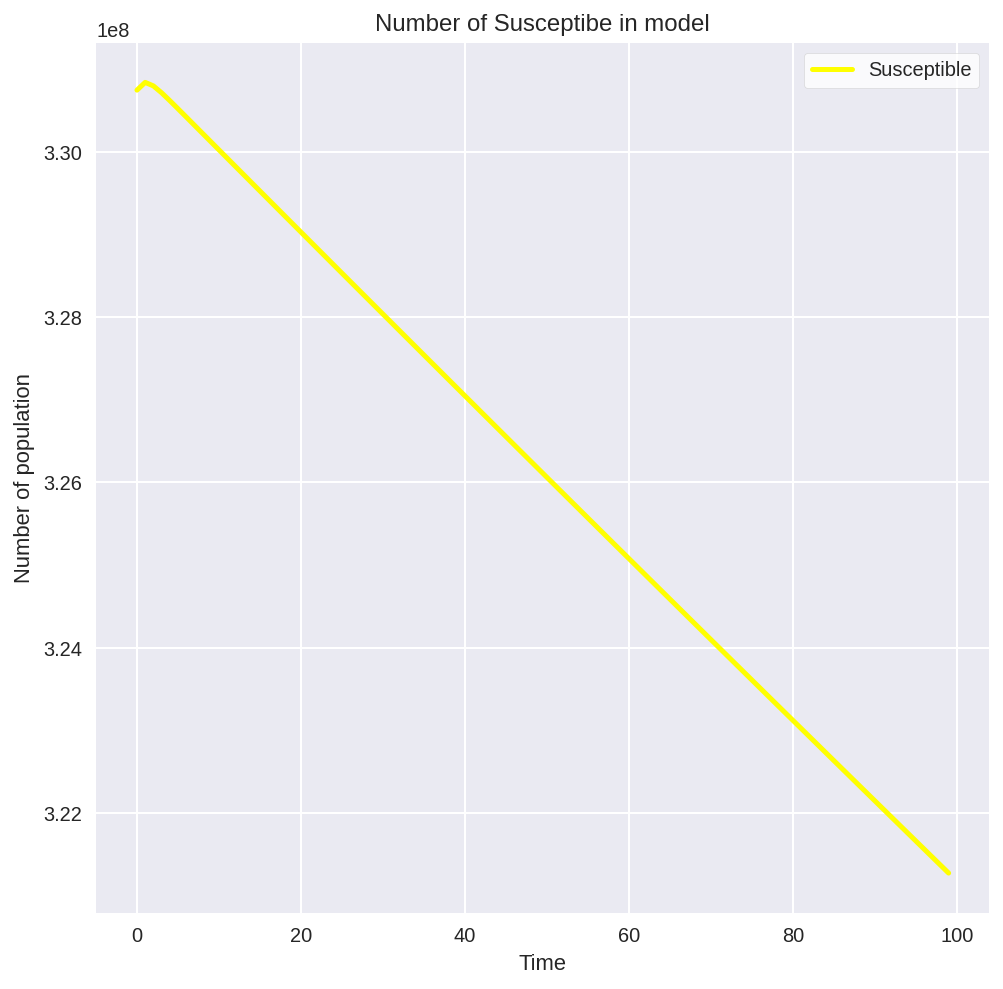

In [21]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Susceptibe in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Susceptible'], c = 'yellow', linewidth = 2.5,label = 'Susceptible') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

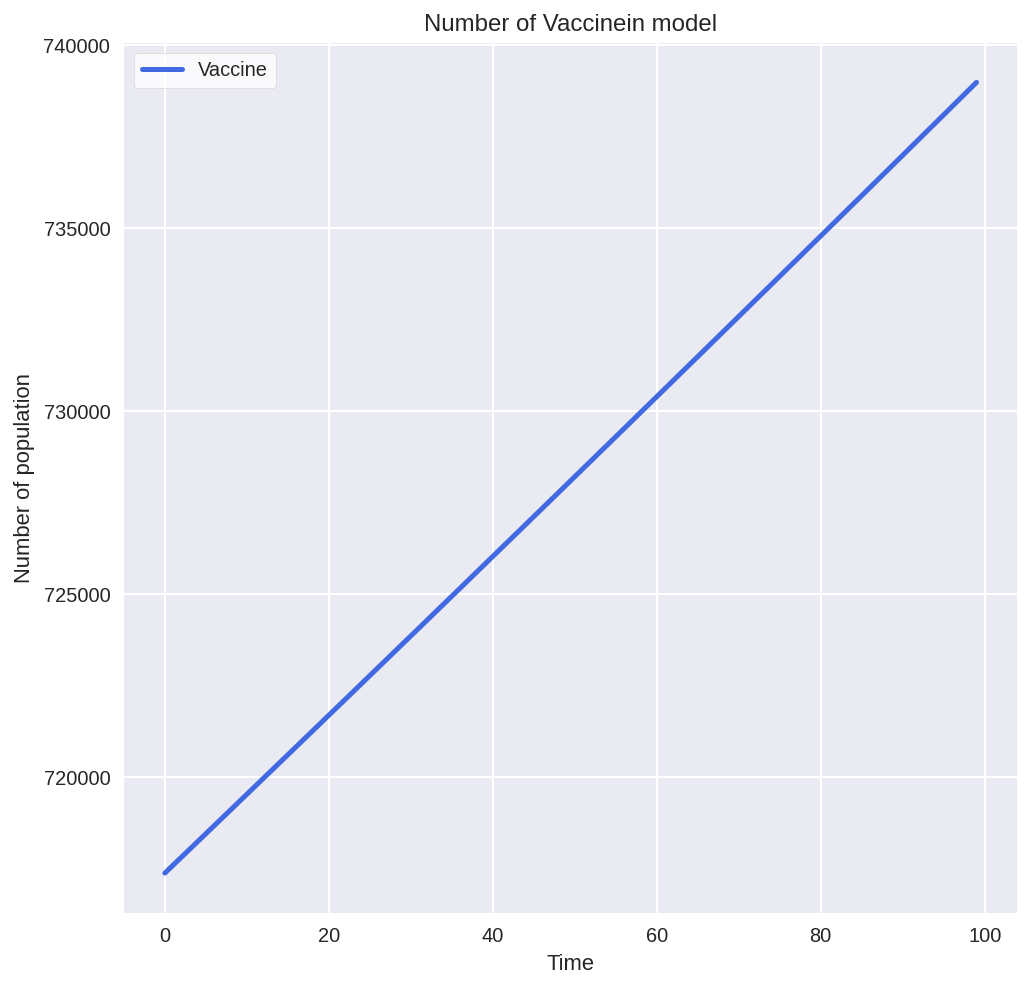

In [22]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Vaccinein model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Vaccine'], c = 'royalblue', linewidth = 2.5,label = 'Vaccine') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

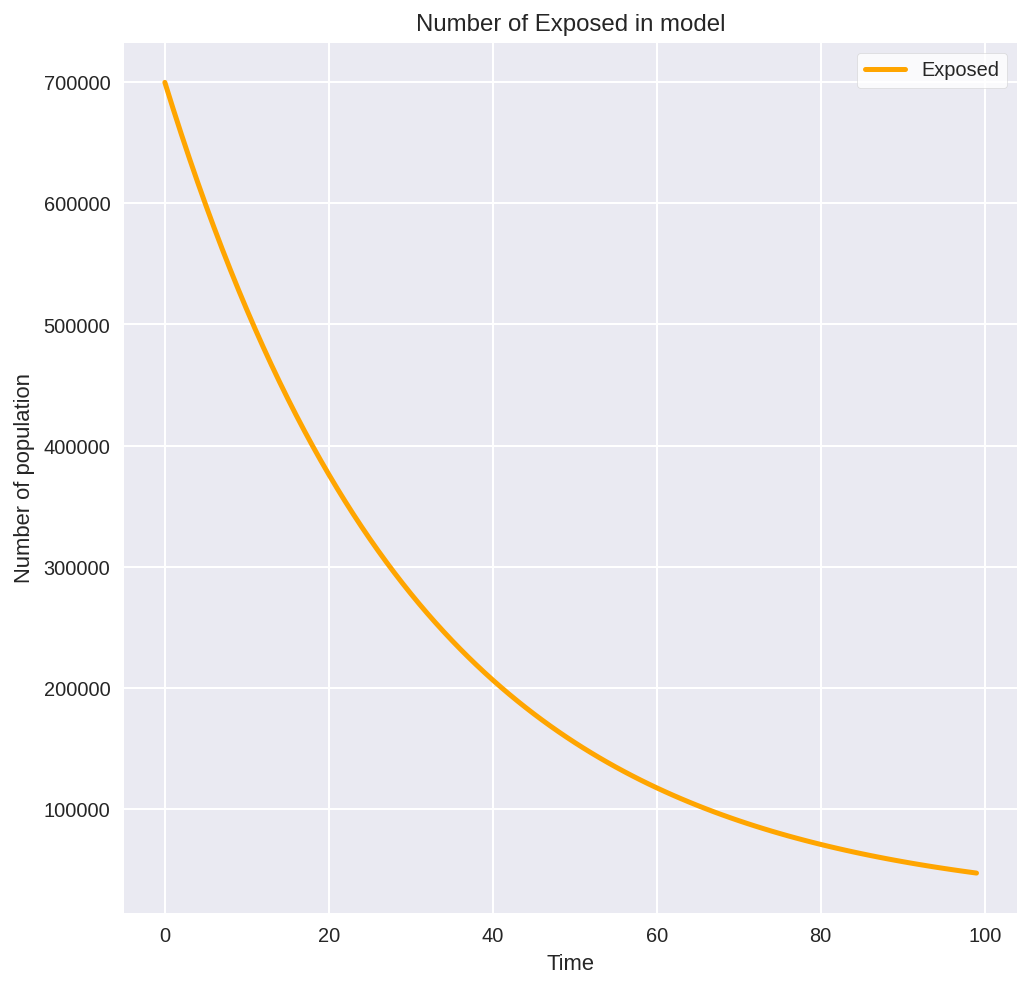

In [23]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Exposed in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Exposed'], c = 'orange', linewidth = 2.5, label = 'Exposed') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

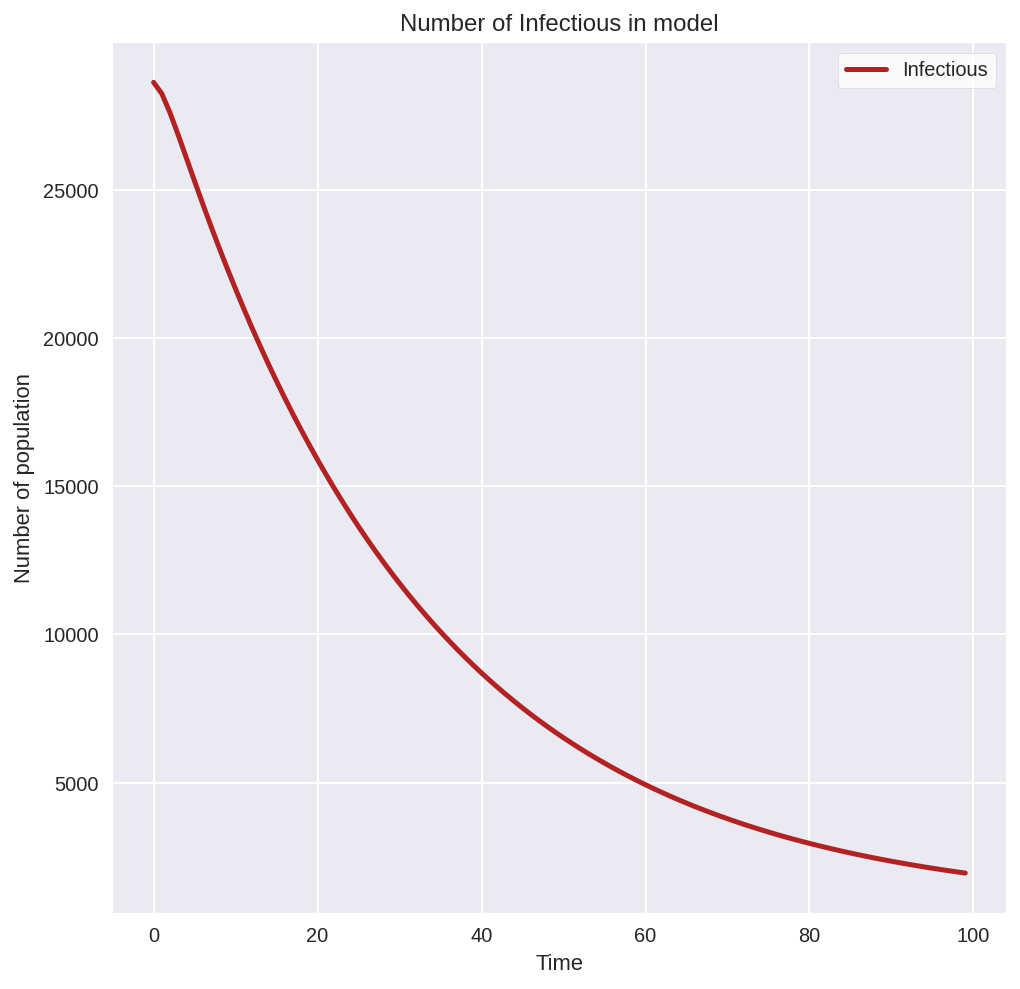

In [24]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Infectious in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

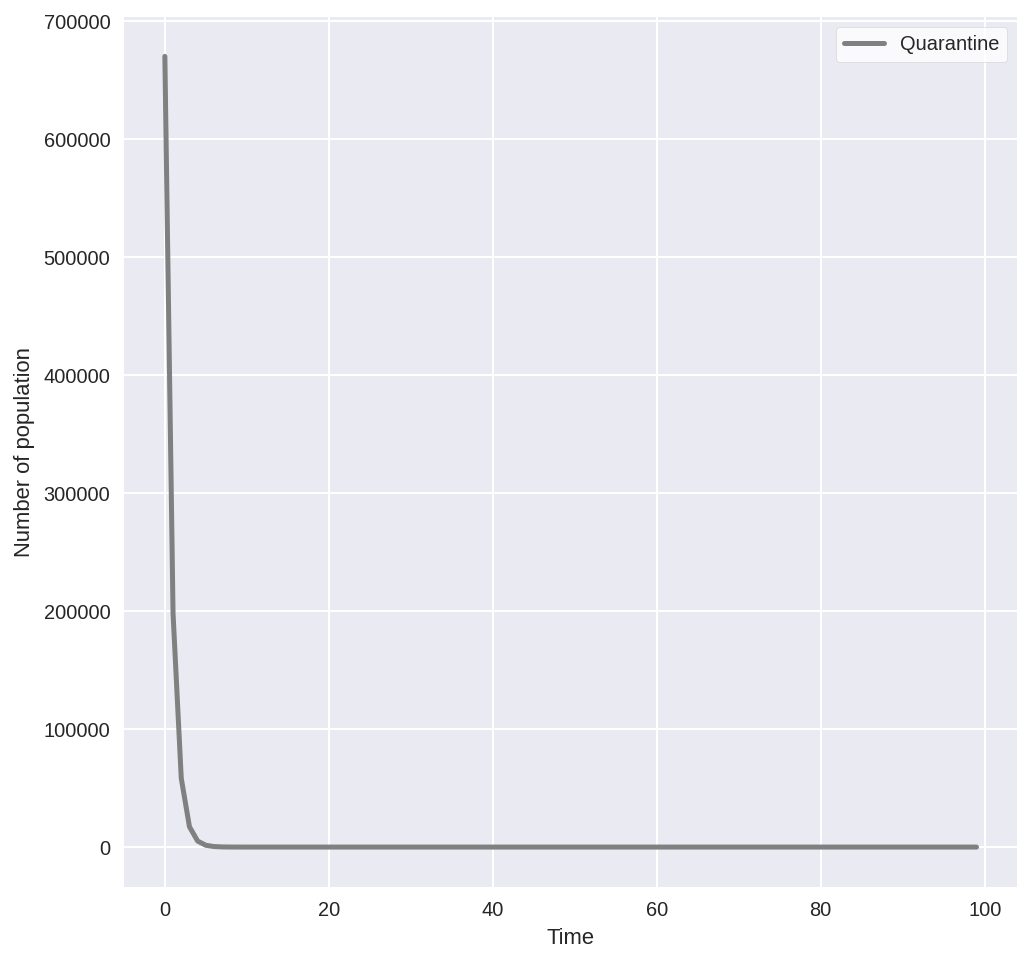

In [20]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Quarantine in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Quarantine'], c = 'gray', linewidth = 2.5,label = 'Quarantine')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

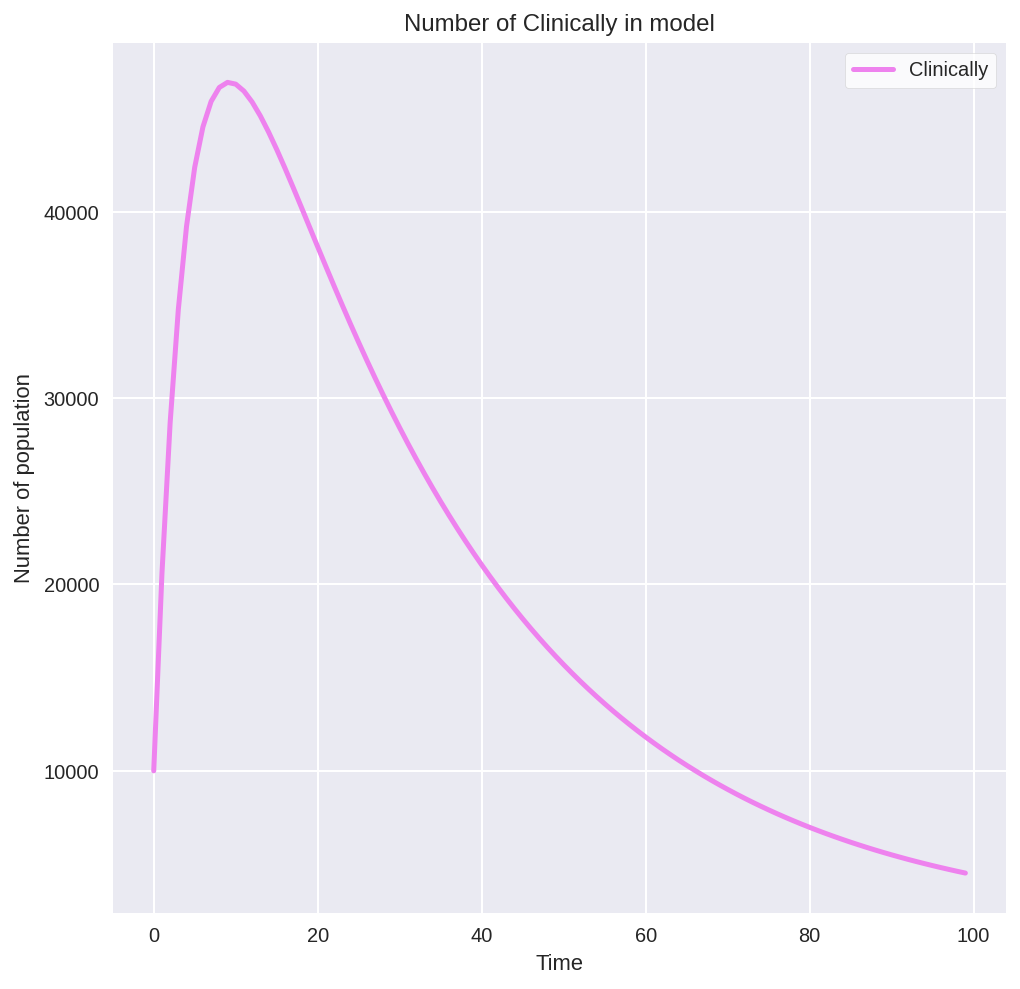

In [25]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Clinically in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Clinically'], c = 'violet',linewidth = 2.5,label = 'Clinically') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

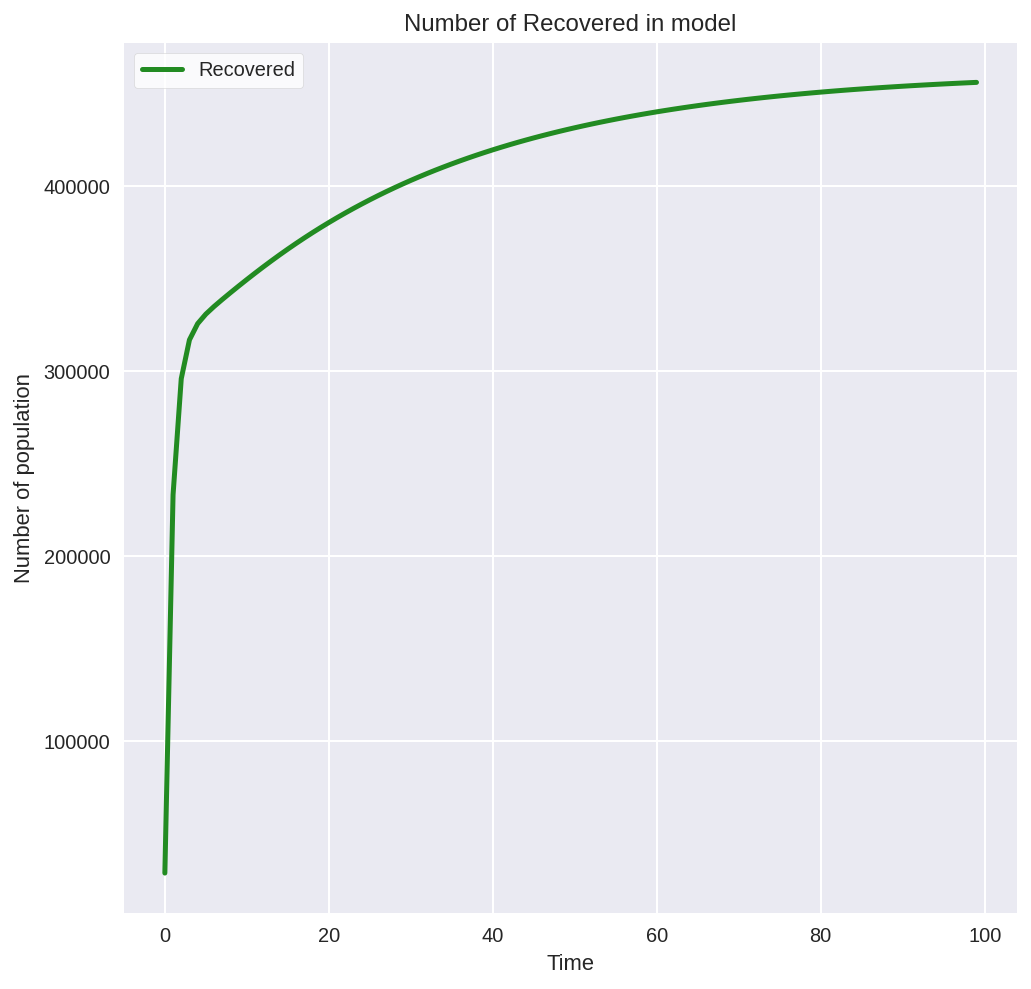

In [26]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Recovered in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Recovered'], c = 'forestgreen', linewidth = 2.5,label = 'Recovered') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

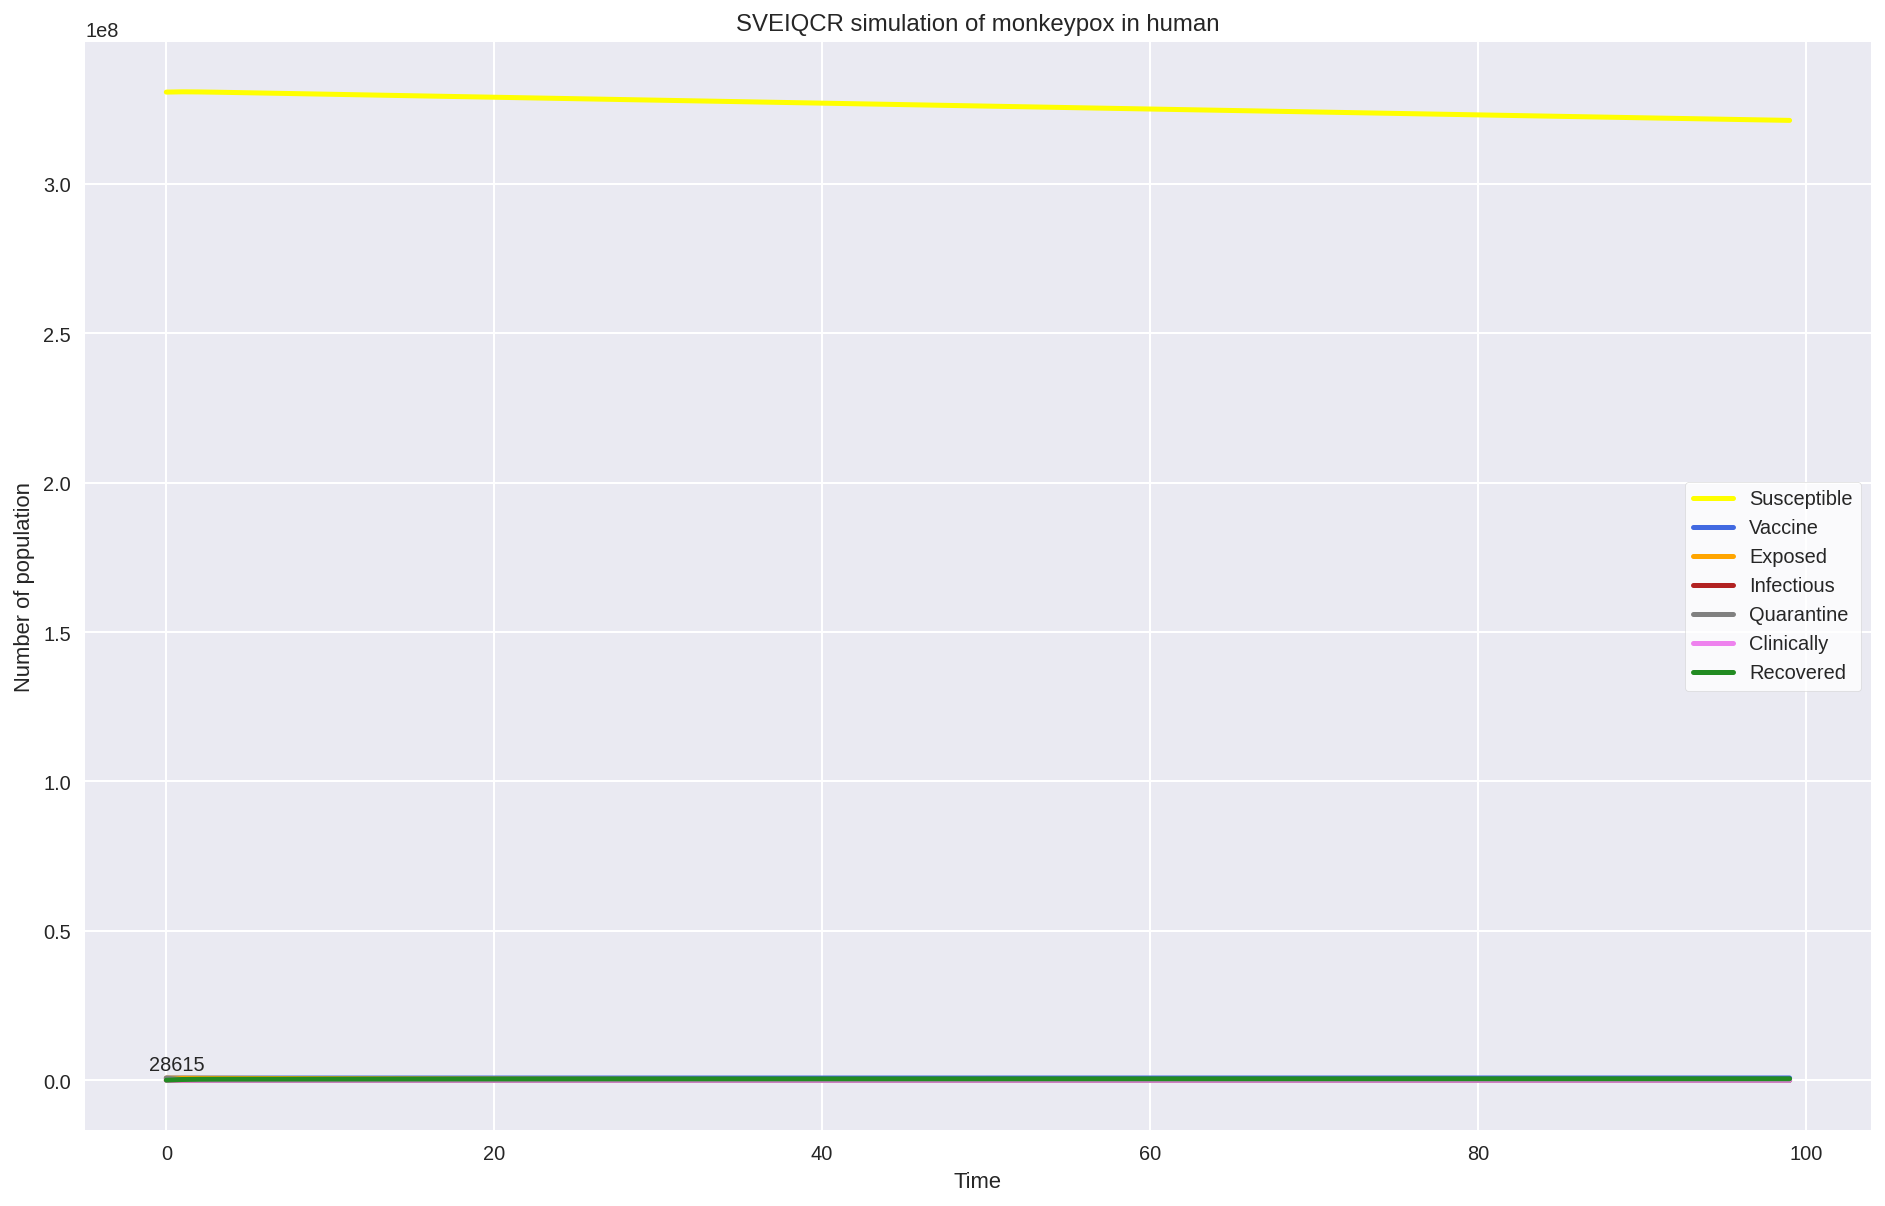

In [27]:
# plot the simulation
plt.figure (figsize = (16, 10)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('SVEIQCR simulation of monkeypox in human') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'yellow', linewidth = 2.5,label = 'Susceptible') 
    plt.plot(simulationResult['Vaccine'], c = 'royalblue', linewidth = 2.5,label = 'Vaccine') 
    plt.plot(simulationResult['Exposed'], c = 'orange', linewidth = 2.5, label = 'Exposed') 
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') 
    plt.plot(simulationResult['Quarantine'], c = 'gray', linewidth = 2.5,label = 'Quarantine') 
    plt.plot(simulationResult['Clinically'], c = 'violet',linewidth = 2.5,label = 'Clinically') 
    plt.plot(simulationResult['Recovered'], c = 'forestgreen', linewidth = 2.5,label = 'Recovered') 
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

# SEI simulation of Monkeypox in rodent

## พารามิเตอร์ของตัวแบบ และสมการเชิงอนุพันธ์

In [9]:
# SEI model ในประชากรสัตว์ฟันแทะ
# Differential equations
def deriv(y, t,Nr, Lambdar, Mur, Lamdar, thetar, deltar): # 
    S, E, I = y
    dSdt = Lambdar-Mur*S-Lamdar*S
    dEdt = Lamdar*S-Mur*E-thetar*E
    dIdt = thetar*E -deltar*I-Mur*I
    return dSdt, dEdt, dIdt

In [12]:
#Initial number 
Sr = 250
Er = 125
Ir = 75
Nr = Sr+Er+Ir

# Time period (100 days)
t = np.arange(0,100,1)

# parameter value
Lambdar = 0.2
Mur = 0.1
Lamdar = 0
thetar = 0.032
deltar = 0.5

# Constant rate 
Lr = 0.2  
Mr = 0.1 
LDr= 0
Tr = 0.032  
dr= 0.5

#Integration SEI model
result_r = odeint(deriv, (Sr, Er, Ir), t, args = (Nr,Lr, Mr, LDr, Tr, dr))

#Summary
simulationResult_r = pd.DataFrame(result_r, columns = ['Susceptible', 'Exposed', 'Infectious', ])
simulationResult_r = simulationResult_r.astype(np.int32)

In [13]:
simulationResult_r

,Susceptible,Exposed,Infectious
0,250,125,75
1,226,109,43
2,205,95,26
3,185,84,16
4,168,73,11
...,...,...,...
95,2,0,0
96,2,0,0
97,2,0,0
98,2,0,0


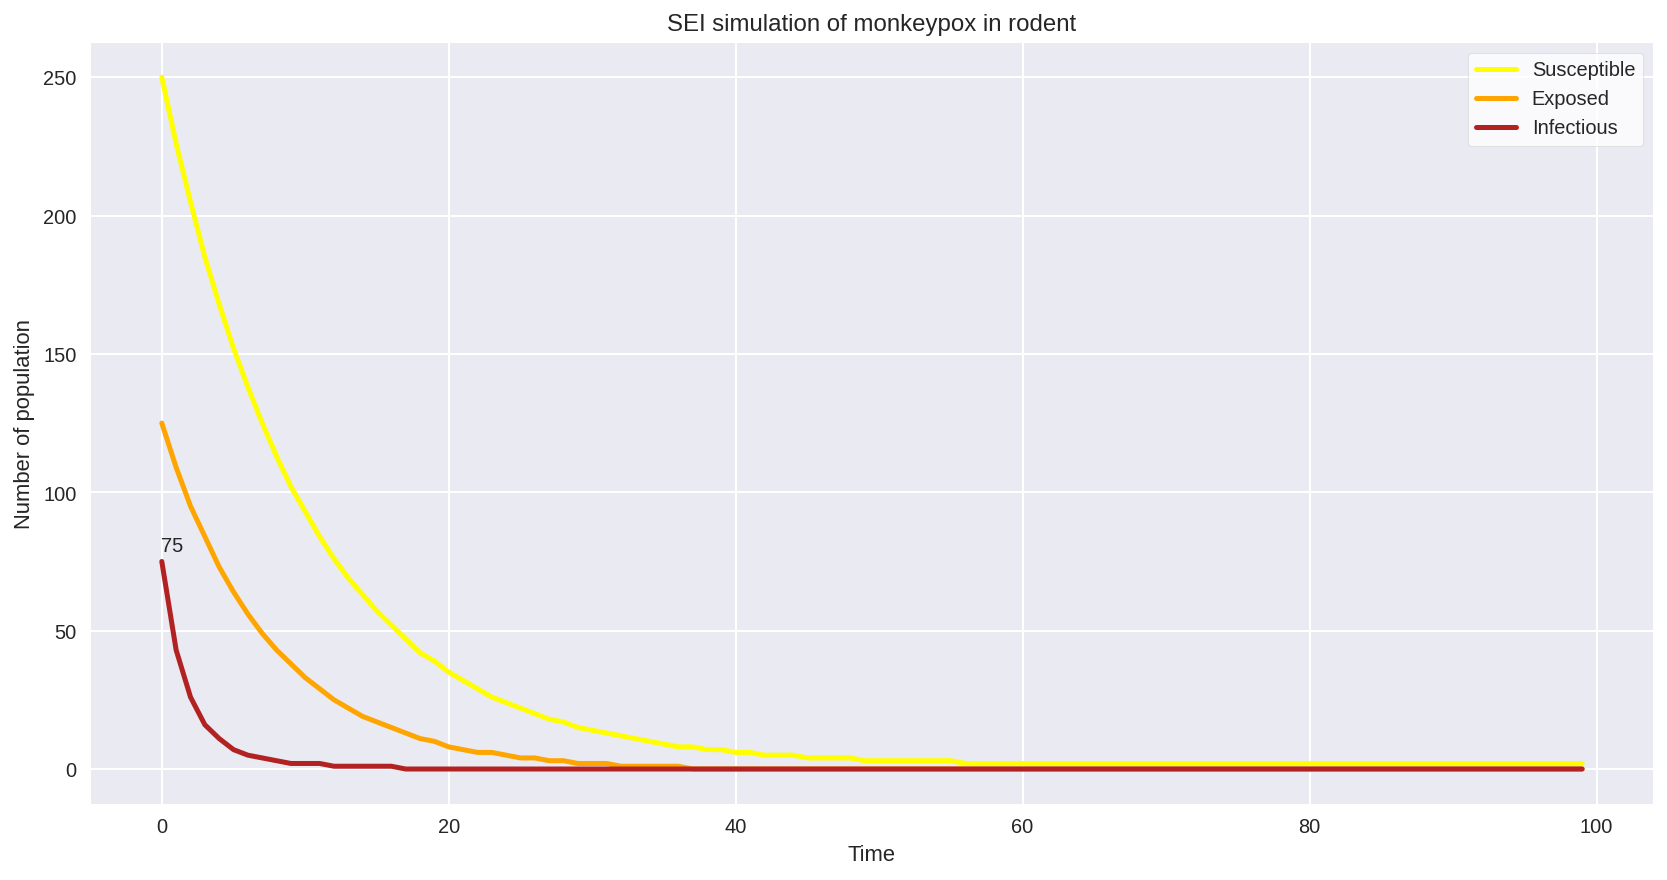

In [16]:
# plot the simulation
plt.figure (figsize = (14, 7)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('SEI simulation of monkeypox in rodent') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult_r['Susceptible'], c = 'yellow', linewidth = 2.5,label = 'Susceptible') 
    plt.plot(simulationResult_r['Exposed'], c = 'orange',linewidth = 2.5,label = 'Exposed') 
    plt.plot(simulationResult_r['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') 
    plt.annotate(simulationResult_r['Infectious'].max(),
                    (simulationResult_r['Infectious'].idxmax(), simulationResult_r['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()